In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
novaMatrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Nova_Matrícula_Separada.csv')
rematrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Rematrícula_Separada.csv')

In [4]:
novaMatrícula['Bolsa'] = novaMatrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
rematrícula['Bolsa'] = rematrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)

In [5]:
novaMatrícula

,Código Candidato,Data de nascimento,Série,Unidade,Data de Inscrição,Data da matrícula,Tipo,Bolsa (%),Real Anuidade,Diferença,Bolsa
0,CL0002,21/1/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
1,CL0002,21/01/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
2,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
3,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
4,CL0047,19/04/2015,5º ano,Conceição do Mato Dentro,2024-12-02,2024-12-02,Matrícula nova,"100,00%",11.471,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
3416,CL9979,09/07/2014,5º ano bilíngue,Lagoa Santa,2024-08-16,2024-12-20,Matrícula nova,"43,00%",14.421,126,43.0
3417,CL9987,11/04/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0
3418,CL9987,11/4/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0
3419,CL9991,18/05/2017,3º ano,Carlos Prates,2024-11-13,2024-11-25,Matrícula nova,"50,00%",12.530,12,50.0


In [6]:
escolas1 = set(novaMatrícula['Unidade'].unique())
escolas1

{'Alípio de Melo',
 'Carajás',
 'Carlos Prates',
 'Castelo',
 'Castelo Manacás',
 'Conceição do Mato Dentro',
 'Gutierrez',
 'Jaraguá',
 'Jardim Canadá',
 'Lagoa Santa',
 'Mais Belvedere',
 'Mais Buritis',
 'Mais Cidade Nova',
 'Mais Pampulha',
 'Nova Suíça',
 'Ouro Preto',
 'Santa Amélia'}

In [7]:
escolas2 = set(rematrícula['Unidade'].unique())
escolas2

{'Alípio de Melo',
 'Carajás',
 'Carlos Prates',
 'Castelo',
 'Castelo Manacás',
 'Conceição do Mato Dentro',
 'Gutierrez',
 'Jaraguá',
 'Jardim Canadá',
 'Lagoa Santa',
 'Mais Belvedere',
 'Mais Buritis',
 'Mais Cidade Nova',
 'Mais Pampulha',
 'Nova Suíça',
 'Ouro Preto',
 'Ouro Preto Integral',
 'Santa Amélia'}

### Demonstrando quais unidades apresentam as maiores concessões de descontos

##### Unidades das novas matrículas

In [8]:
vetor = []
for escola in escolas1:
    pe = novaMatrícula[novaMatrícula['Unidade'] == escola]['Bolsa'].max()
    if(pe == 100):
        vetor.append(escola)
    print("O maior desconto oferecido da unidade", escola, "é de:", pe, "por cento.")

O maior desconto oferecido da unidade Jaraguá é de: 64.0 por cento.
O maior desconto oferecido da unidade Carlos Prates é de: 100.0 por cento.
O maior desconto oferecido da unidade Jardim Canadá é de: 70.0 por cento.
O maior desconto oferecido da unidade Castelo é de: 100.0 por cento.
O maior desconto oferecido da unidade Conceição do Mato Dentro é de: 100.0 por cento.
O maior desconto oferecido da unidade Mais Belvedere é de: 80.0 por cento.
O maior desconto oferecido da unidade Mais Pampulha é de: 100.0 por cento.
O maior desconto oferecido da unidade Gutierrez é de: 70.0 por cento.
O maior desconto oferecido da unidade Mais Buritis é de: 74.0 por cento.
O maior desconto oferecido da unidade Alípio de Melo é de: 100.0 por cento.
O maior desconto oferecido da unidade Mais Cidade Nova é de: 100.0 por cento.
O maior desconto oferecido da unidade Santa Amélia é de: 100.0 por cento.
O maior desconto oferecido da unidade Carajás é de: 100.0 por cento.
O maior desconto oferecido da unidade 

Lista das unidades que mais dão descontos

In [9]:
i = 0
while i < len(vetor):
    print(vetor[i])
    i+=1

Carlos Prates
Castelo
Conceição do Mato Dentro
Mais Pampulha
Alípio de Melo
Mais Cidade Nova
Santa Amélia
Carajás
Castelo Manacás
Lagoa Santa
Ouro Preto
Nova Suíça


##### Unidades das rematrículas

In [10]:
for escola in escolas2:
    pe = rematrícula[rematrícula['Unidade'] == escola]['Bolsa'].max()
    print("O maior desconto oferecido da unidade ", escola, "é: ", pe, "por cento.")

O maior desconto oferecido da unidade  Jaraguá é:  100.0 por cento.
O maior desconto oferecido da unidade  Carlos Prates é:  100.0 por cento.
O maior desconto oferecido da unidade  Jardim Canadá é:  100.0 por cento.
O maior desconto oferecido da unidade  Conceição do Mato Dentro é:  100.0 por cento.
O maior desconto oferecido da unidade  Castelo é:  100.0 por cento.
O maior desconto oferecido da unidade  Castelo Manacás é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Belvedere é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Pampulha é:  100.0 por cento.
O maior desconto oferecido da unidade  Gutierrez é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Cidade Nova é:  100.0 por cento.
O maior desconto oferecido da unidade  Alípio de Melo é:  100.0 por cento.
O maior desconto oferecido da unidade  Mais Buritis é:  100.0 por cento.
O maior desconto oferecido da unidade  Ouro Preto Integral é:  100.0 por cento.
O maior desconto oferecido da u

Na rematrícula todas as unidades dão descontos que podem ir até 100%.

### Demonstrando a média de desconto das unidades

In [11]:
médiaRematrícula = rematrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    Contagem = ('Bolsa' , 'count')
)

In [12]:
médiaRematrícula['média'] = round(médiaRematrícula['Soma']/médiaRematrícula['Contagem'])
médiaRematrícula

,Soma,Contagem,média
Unidade,,,
Alípio de Melo,37084.4,735,50.0
Carajás,115573.8,1178,98.0
Carlos Prates,20599.1,365,56.0
Castelo,9129.8,173,53.0
Castelo Manacás,11070.5,209,53.0
Conceição do Mato Dentro,18994.4,352,54.0
Gutierrez,15281.7,378,40.0
Jaraguá,12205.6,277,44.0
Jardim Canadá,9446.7,218,43.0


In [13]:
médiaNovaMatrícula = novaMatrícula.groupby('Unidade').agg(
    Soma = ('Bolsa', 'sum'),
    Contagem = ('Bolsa' , 'count')
)

In [14]:
médiaNovaMatrícula['média'] = round(médiaNovaMatrícula['Soma']/médiaNovaMatrícula['Contagem'])
médiaNovaMatrícula

,Soma,Contagem,média
Unidade,,,
Alípio de Melo,18648.7,328,57.0
Carajás,17900.0,182,98.0
Carlos Prates,15689.6,256,61.0
Castelo,9049.2,150,60.0
Castelo Manacás,6776.0,125,54.0
Conceição do Mato Dentro,13205.0,223,59.0
Gutierrez,8169.0,168,49.0
Jaraguá,6665.2,132,50.0
Jardim Canadá,5244.4,99,53.0


(array([ 0.075,  1.075,  2.075,  3.075,  4.075,  5.075,  6.075,  7.075,
         8.075,  9.075, 10.075, 11.075, 12.075, 13.075, 14.075, 15.075,
        16.075, 17.075]),
 [Text(0.075, 0, 'Jaraguá'),
  Text(1.075, 0, 'Carlos Prates'),
  Text(2.075, 0, 'Jardim Canadá'),
  Text(3.075, 0, 'Conceição do Mato Dentro'),
  Text(4.075, 0, 'Castelo'),
  Text(5.075, 0, 'Castelo Manacás'),
  Text(6.075, 0, 'Mais Belvedere'),
  Text(7.075, 0, 'Mais Pampulha'),
  Text(8.075, 0, 'Gutierrez'),
  Text(9.075, 0, 'Mais Cidade Nova'),
  Text(10.075, 0, 'Alípio de Melo'),
  Text(11.075, 0, 'Mais Buritis'),
  Text(12.075, 0, 'Ouro Preto Integral'),
  Text(13.075, 0, 'Carajás'),
  Text(14.075, 0, 'Santa Amélia'),
  Text(15.075, 0, 'Lagoa Santa'),
  Text(16.075, 0, 'Ouro Preto'),
  Text(17.075, 0, 'Nova Suíça')])

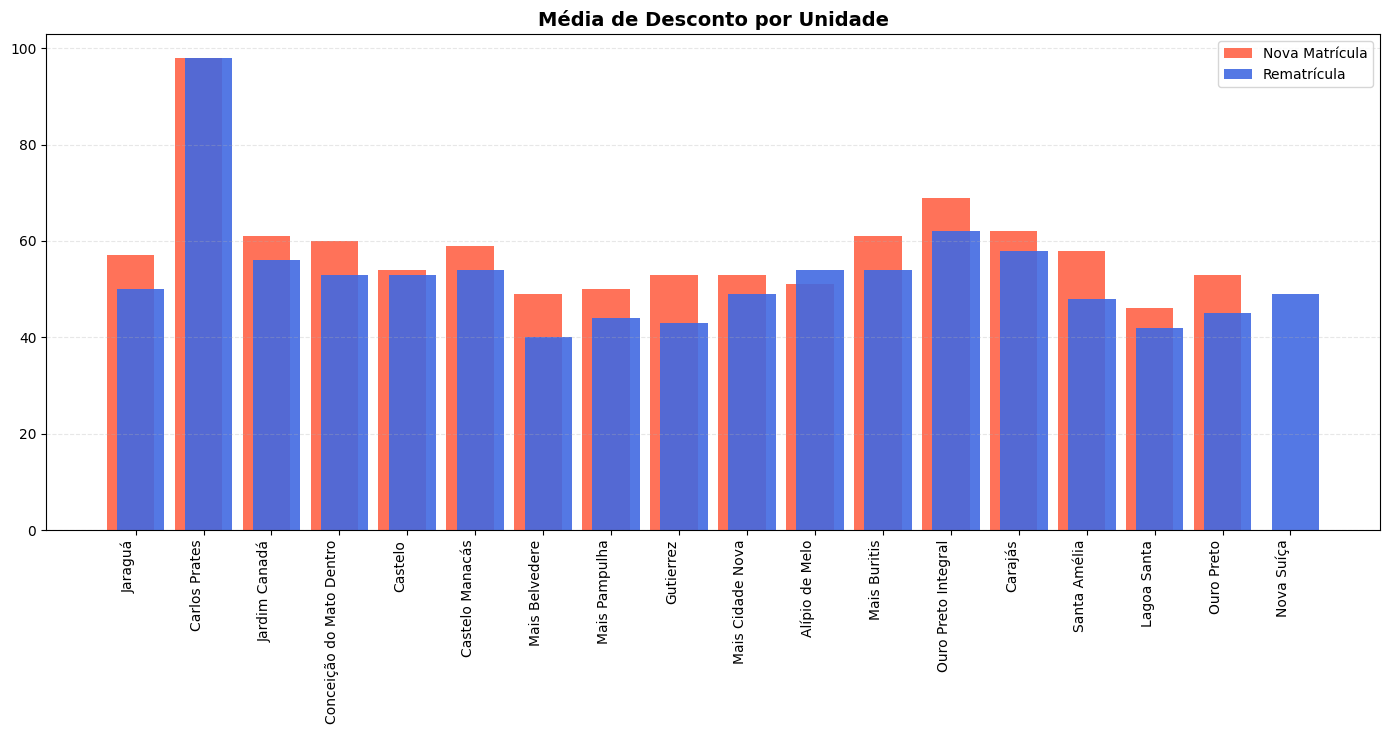

In [ ]:
x = np.arange(len(escolas1))
y = np.arange(len(escolas2))
bar_width = 0.6
overlap = 0.15  

fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x, médiaNovaMatrícula['média'], color='tomato', alpha=0.9, label='Nova Matrícula', width=0.7)

ax.bar(y + overlap, médiaRematrícula['média'], color='royalblue', alpha=0.9, label='Rematrícula', width=0.7)

ax.set_xticks(y + overlap/2)
ax.set_xticklabels(escolas2, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.yticks(fontsize=10)
plt.title('Média de Desconto por Unidade', fontsize=14, weight='bold')
plt.tight_layout()
plt.legend()
plt.xticks(rotation=90)